# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise de Imagens com Inteligência Artificial</font>

## <font color='blue'>Projeto 1</font>
## <font color='blue'>Manipulação de Imagens com Técnicas de Visão Computacional</font>

![title](imagens/Projeto1.png)

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# https://opencv.org/
# https://pypi.org/project/opencv-python/
!pip install -q opencv-python==4.6.0.66

In [4]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy     : 1.21.5
matplotlib: 3.5.2
cv2       : 4.6.0



## Carregando e Visualizando Imagens em Python

In [6]:
# Carregando uma imagem
img1 = cv2.imread('imagens/img1.jpg')

In [7]:
type(img1)

numpy.ndarray

In [8]:
img1.shape

(384, 612, 3)

In [9]:
print(img1)

[[[ 80  84 109]
  [ 79  83 108]
  [ 80  83 111]
  ...
  [ 71  58  50]
  [ 71  58  50]
  [ 72  59  51]]

 [[ 82  86 111]
  [ 82  86 111]
  [ 82  85 113]
  ...
  [ 71  58  50]
  [ 72  59  51]
  [ 72  59  51]]

 [[ 84  88 113]
  [ 84  88 113]
  [ 85  88 116]
  ...
  [ 72  59  51]
  [ 72  59  51]
  [ 73  60  52]]

 ...

 [[  0  57  33]
  [  6  58  28]
  [  6  47  15]
  ...
  [  7  73  62]
  [  0  55  45]
  [  0  56  47]]

 [[  6  68  44]
  [  0  49  19]
  [  3  41  11]
  ...
  [  0  55  44]
  [  8  65  56]
  [  6  53  45]]

 [[  3  68  42]
  [  0  38   8]
  [  3  38  11]
  ...
  [  0  60  49]
  [ 18  71  62]
  [  0  34  27]]]


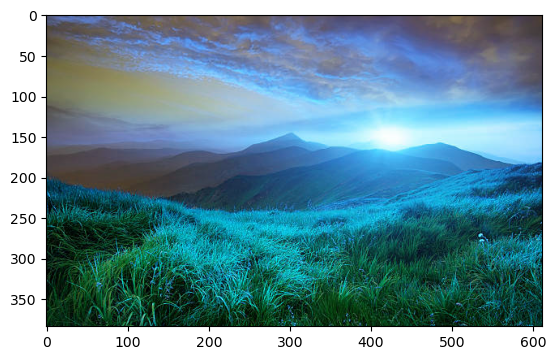

In [10]:
plt.imshow(img1)

Por padrão o OpenCV carrega as imagens com o formato de pixel BGR (Blue, Green, Red). A razão pela qual os primeiros desenvolvedores do OpenCV escolheram esse formato de cores é que naquela época (começo do ano 2000) o formato de cores BGR era popular entre os fabricantes de câmeras e fornecedores de software. BGR foi uma escolha feita por razões históricas e agora temos que conviver com isso.

Mas hoje o formato padrão de cores é RGB (Red, Blue, Green).

O formato de pixel BGR padrão não funciona bem com bibliotecas que usam o formato de pixel RGB padrão. Por exemplo. quando você tenta exibir uma imagem usando matplotlib depois de lê-la usando imread no OpenCV, o resultado é este que você vê acima, com as cores da imagem impressa diferentes das cores da imagem original.

**Formato de Pixel BGR ou RGB?**

A principal diferença entre RGB e BGR é a disposição dos subpixels para vermelho, verde e azul. O RGB é organizado nessa ordem, mas o BGR é essencialmente inverso, sem nenhum efeito adverso na vibração e precisão das cores. Apenas inversão dos canais de cores.

Mas como a maioria das imagens atualmente usa padrão RGB é melhor trabalhar com esse formato.

> Vamos criar uma função customizada para visualizar as imagens convertendo de BGR para RGB.

In [11]:
# Função customizada
def visualiza_imagem(*args, figsize = 8, to_rgb = True, title = None, fontsize = 10):
    
    # Ajusta o tamanho da imagem
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    
    # Lista com todas as imagens passadas como argumento
    images = args[0] if type(args[0]) is list else list(args)
    
    # Converteremos as imagens para RGB
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    
    # Cada imagem deverá ter um título
    if title is not None:
        assert len(title) == len(images), "Forneça um título para a imagem."
    
    # Tamanho da figurea
    plt.figure(figsize = figsize)
    
    # Cria os subplots para imprimir as imagens
    for i in range(1, len(images) + 1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i - 1], fontsize = fontsize)
        plt.imshow(images[i - 1])
        plt.axis('off')

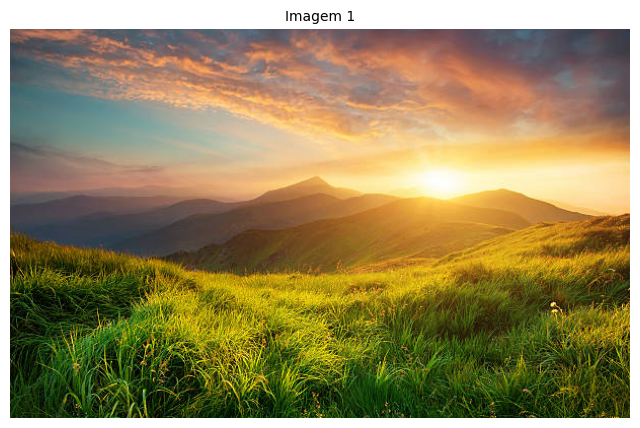

In [12]:
# Carregando e visualizando uma imagem
img1 = cv2.imread('imagens/img1.jpg')
visualiza_imagem(img1, title = ['Imagem 1'])

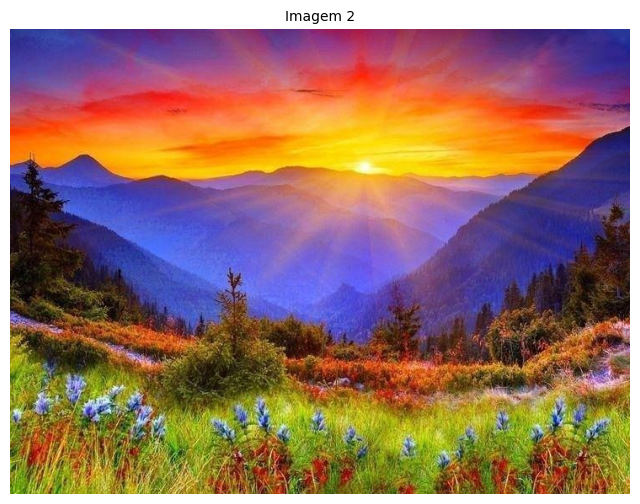

In [13]:
# Carregando e visualizando uma imagem
img2 = cv2.imread('imagens/img2.jpg')
visualiza_imagem(img2, title = ['Imagem 2'])

## Visualizando e Customizando os Canais de Cores

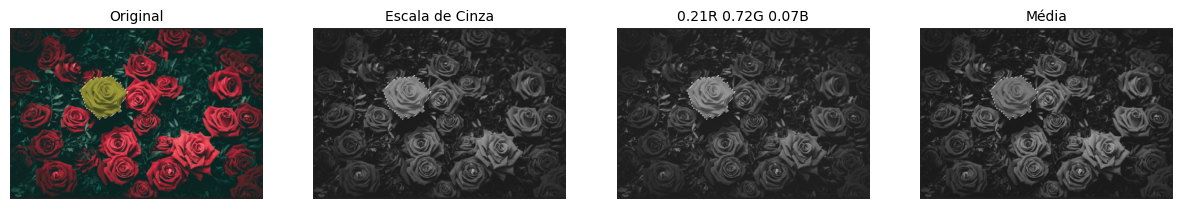

In [14]:
# Carregando uma imagem de formas diferentes

# Imagem original
img3_A = cv2.imread('imagens/img3.png')

# Imagem com escala de cinza
img3_B = cv2.imread('imagens/img3.png', cv2.IMREAD_GRAYSCALE)

# Matriz de pixels e divisão dos canais de cores
img_temp = cv2.imread('imagens/img3.png').astype('float32')
b, g, r = cv2.split(img_temp)

# Modificando o percentual de cada cor da imagem
img3_C = (0.21*r + 0.72*g + 0.07*b).astype('uint8')

# Equalizando os pixels pela média
img3_D = ((r + g + b) / 3.0).astype('uint8')

# Visualizando as imagens
visualiza_imagem(img3_A, img3_B, img3_C, img3_D, title = ['Original', 
                                                          'Escala de Cinza', 
                                                          '0.21R 0.72G 0.07B', 
                                                          'Média'], figsize = 15)

In [15]:
# Carregando a imagem e visualizando os canais de cores

# Imagem original
img4 = cv2.imread('imagens/img4.jpg')

# Split dos canais de cores
b, g, r = cv2.split(img4)

print(f'Dimensões da Imagem: {img4.shape}')

# Dimensões de um dos canais de cores
print(f'Dimensões de b: {b.shape}')

# Dimensões de um dos canais de cores
print(f'Dimensões de g: {g.shape}')

# Dimensões de um dos canais de cores
print(f'Dimensões de r: {r.shape}')

Dimensões da Imagem: (365, 640, 3)
Dimensões de b: (365, 640)
Dimensões de g: (365, 640)
Dimensões de r: (365, 640)


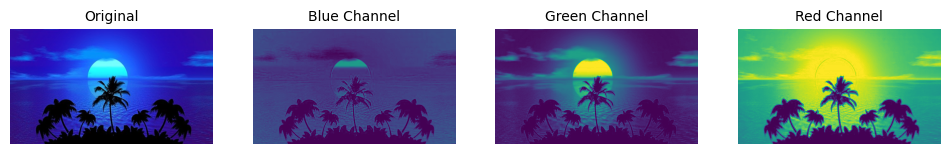

In [16]:
# Visualiza a imagem com o padrão BGR
visualiza_imagem(img4, b, g, r, 
                 to_rgb = False, 
                 title = ['Original', 'Blue Channel', 'Green Channel', 'Red Channel'], figsize = 12)

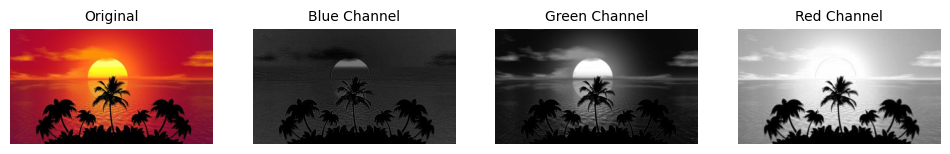

In [17]:
# Visualiza a imagem com o padrão RGB
visualiza_imagem(img4, b, g, r, 
                 to_rgb = True, 
                 title = ['Original', 'Blue Channel', 'Green Channel', 'Red Channel'], figsize = 12)

> Quanto mais claro um canal, mais ele contribui a imagem!

## Array Slicing

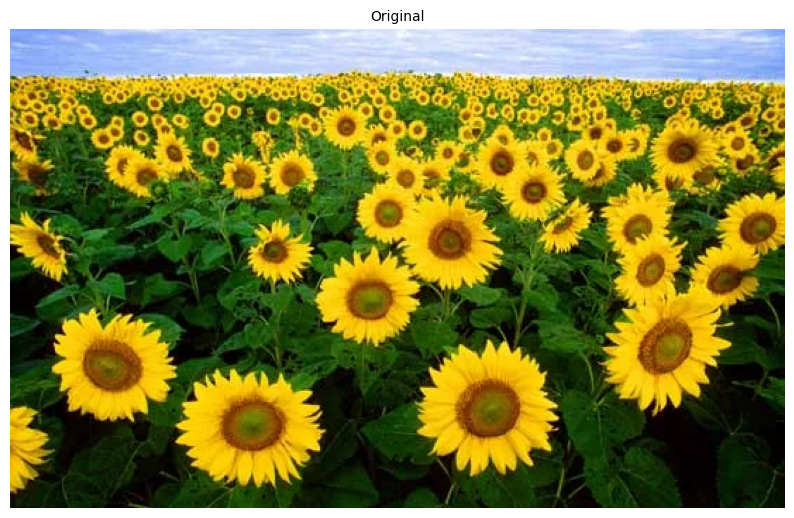

In [18]:
# Carrega a imagem
img5 = cv2.imread('imagens/img5.jpg')

# Visualiza
visualiza_imagem(img5, title = ['Original'], figsize = 10)

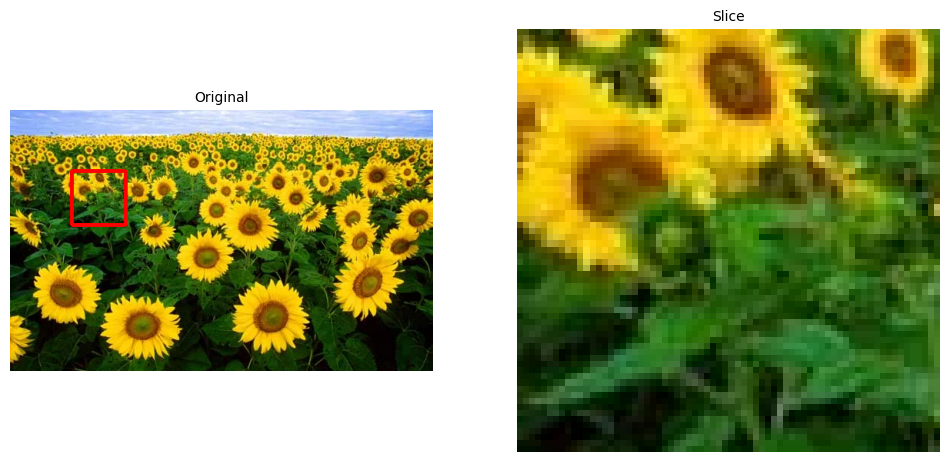

In [19]:
# Vamos extrair um slice (fatia) da imagem

# Carrega a imagem
img5 = cv2.imread('imagens/img5.jpg')

# Define as coordenadas da fatia que desejamos extrair
start = (80, 80)
end = (150, 150)

# Extrai os pixels nas coordenadas desejadas
fatia = img5.copy()[start[0]:end[0], start[1]:end[1]]

# Desenha um retângulo (caixa delimitadora) na imagem original mostrando as coordenadas
img5 = cv2.rectangle(img5, start, end, (0, 0, 255), 3)

# Visualiza
visualiza_imagem(img5, fatia, title = ['Original', 'Slice'], figsize = 12)

## Intensity Quantization (Quantização de Intensidade)

A quantização, envolvida no processamento de imagens, é uma técnica de compactação com perdas obtida pela compactação de uma faixa de valores em um único valor discreto. 

Quando o número de símbolos discretos em um determinado fluxo é reduzido, o fluxo se torna mais compressível. Por exemplo, podemos usar essa técnica para reduzir o número de cores necessárias e então reduzir o tamanho de uma imagem digital.

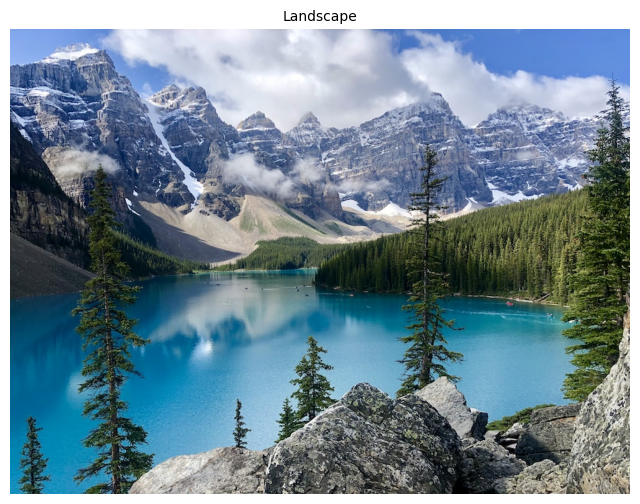

In [20]:
# Carregando e visualizando uma imagem
img6 = cv2.imread('imagens/img6.jpg')
visualiza_imagem(img6, title = ['Landscape'])

In [21]:
# Função
def intensity_quantization(image, n_bits):
    coeff = 2**8 // 2**n_bits
    return (image // coeff) * coeff

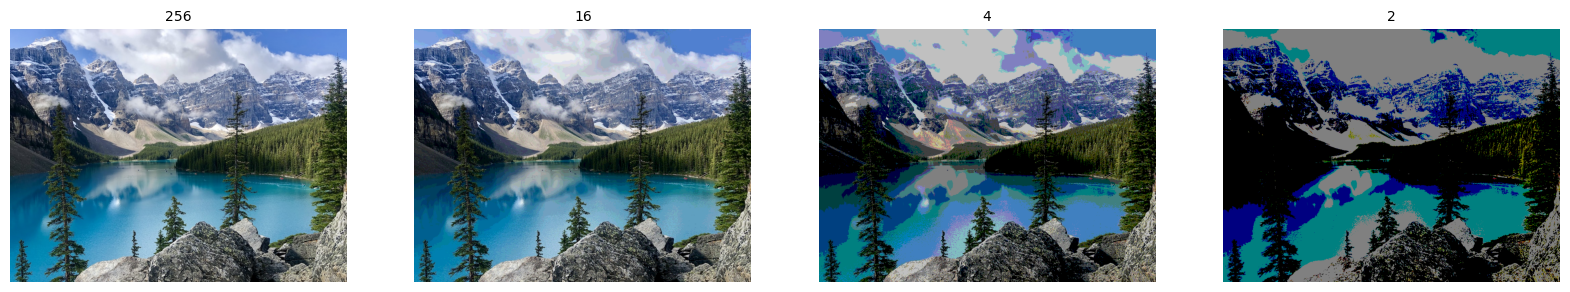

In [22]:
# Aplica a função com diferentes números de bits
img4bit = intensity_quantization(img6, 4)
img2bit = intensity_quantization(img6, 2)
img1bit = intensity_quantization(img6, 1)

# Títulos
titles = [len(np.unique(img6)), len(np.unique(img4bit)), len(np.unique(img2bit)), len(np.unique(img1bit)),]

# Visualiza
visualiza_imagem(img6, img4bit, img2bit, img1bit, title = titles, figsize = 20)

## Interpolação

A interpolação de imagens ocorre quando você redimensiona ou distorce uma imagem de uma grade de pixels para outra. O redimensionamento da imagem é necessário quando você precisa aumentar ou diminuir o número total de pixels, enquanto o remapeamento pode ocorrer quando você está corrigindo uma distorção da imagem ou girando uma imagem.

É uma técnica usada para redimensionar imagens.

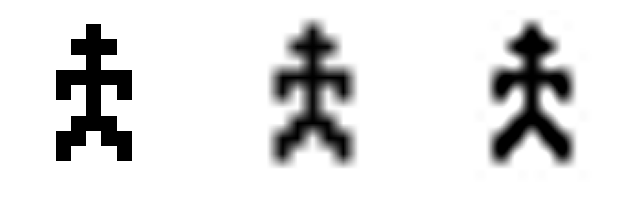

In [23]:
# Carrega a imagem com escala de cinza
img7 = cv2.imread('imagens/img7.png', cv2.IMREAD_GRAYSCALE)

# Interpolação linear
img7linear = cv2.resize(img7, (100, 100), interpolation = cv2.INTER_LINEAR)

# Interpolação cúbica
img7cubic = cv2.resize(img7, (100, 100), interpolation = cv2.INTER_CUBIC)

# Visualiza
visualiza_imagem(img7, img7linear, img7cubic)

## Aritmética de Pixels

Como as imagens são matrizes, podemos realizar qualquer tipo de operação permitido com matrizes visando reduzir o tamanho da imagem, realçar um objeto ou segmentar uma área da imagem.

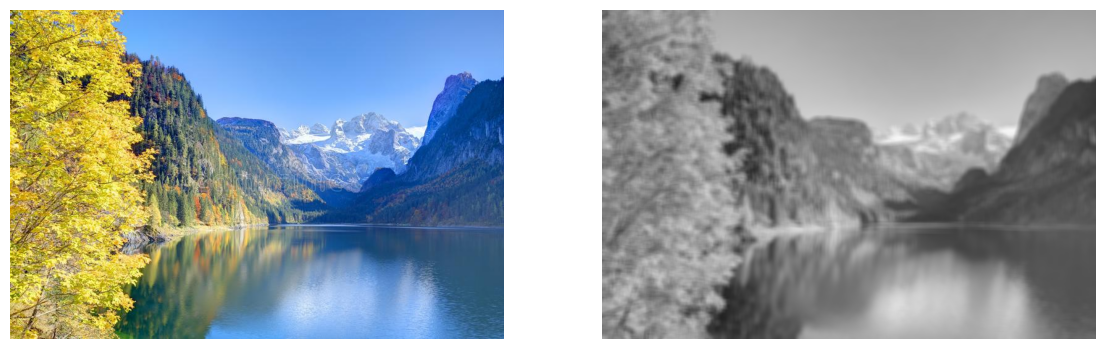

In [24]:
# Carrega a imagem
img8 = cv2.imread('imagens/img8.jpg')

# Cria um array com as dimensões das imagens
img8_medias = np.zeros_like(img8, dtype = 'uint8')

# Define um valor para as operações
size = 4

# Loop externo
for i in range(img8.shape[0]):
    
    # Loop interno
    for j in range(img8.shape[1]):
        
        x_start = max(i - size, 0)
        x_end = min(i + size, img8.shape[0]-1)
        y_start = max(j - size, 0)
        y_end = min(j + size, img8.shape[1]-1)
        
        # Calcula a média
        valor = img8[x_start:x_end + 1, y_start:y_end + 1].mean()
        
        # Armazena na lista de médias
        img8_medias[i, j] = valor

# Visualiza
visualiza_imagem(img8, img8_medias, figsize = 14)

## Gaussian Blur

No processamento de imagens, um Gaussian Blur (ou desfoque gaussiano, também conhecido como suavização gaussiana) é o resultado do desfoque de uma imagem por uma função gaussiana (em homenagem ao matemático e cientista Carl Friedrich Gauss).

É um efeito amplamente utilizado em software gráfico, geralmente para reduzir o ruído da imagem e reduzir os detalhes. O efeito visual dessa técnica é um desfoque suave semelhante ao da visualização da imagem através de uma tela translúcida, distintamente diferente do efeito produzido por uma lente desfocada ou pela sombra de um objeto sob iluminação normal.

A suavização gaussiana também é usada como um estágio de pré-processamento em algoritmos de Visão Computacional para aprimorar estruturas de imagem em diferentes escalas.

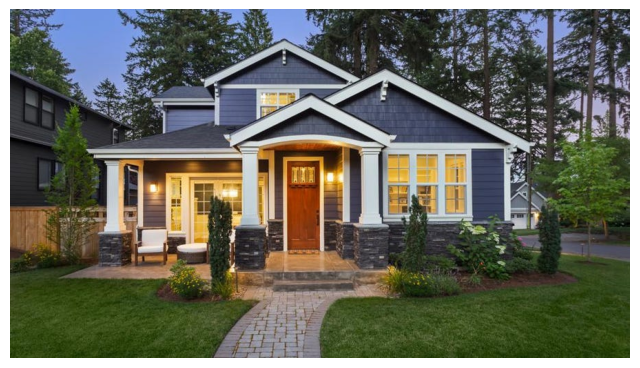

In [25]:
# Carrega a imagem
img9 = cv2.imread('imagens/img9.jpg')

# Visualiza
visualiza_imagem(img9, figsize = 8)

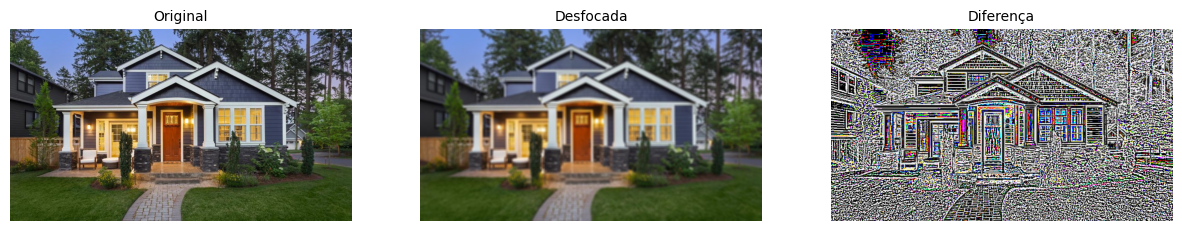

In [26]:
# Carrega a imagem
img9 = cv2.imread('imagens/img9.jpg')

# Aplica o desfoque gaussiano à imagem
blur = cv2.GaussianBlur(img9, (7, 7), 7)

# Calcula a diferença entre a imagem original e a imagem desfocada
diff = img9 - blur

# Visualiza
visualiza_imagem(img9, blur, diff, title = ['Original', 'Desfocada', 'Diferença'], figsize = 15)

## Masking

O mascaramento é um método de processamento de imagem no qual definimos um pequeno 'pedaço de imagem' e o usamos para modificar uma imagem maior. O mascaramento é o processo que está por trás de muitos tipos de processamento de imagem, incluindo detecção de borda, detecção de movimento e redução de ruído.

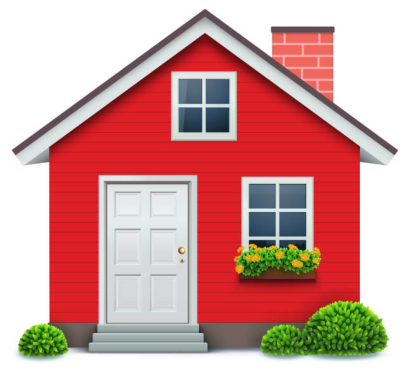

In [27]:
# Carrega a imagem
img10 = cv2.imread('imagens/img10.jpg')

# Visualiza
visualiza_imagem(img10, figsize = 5)

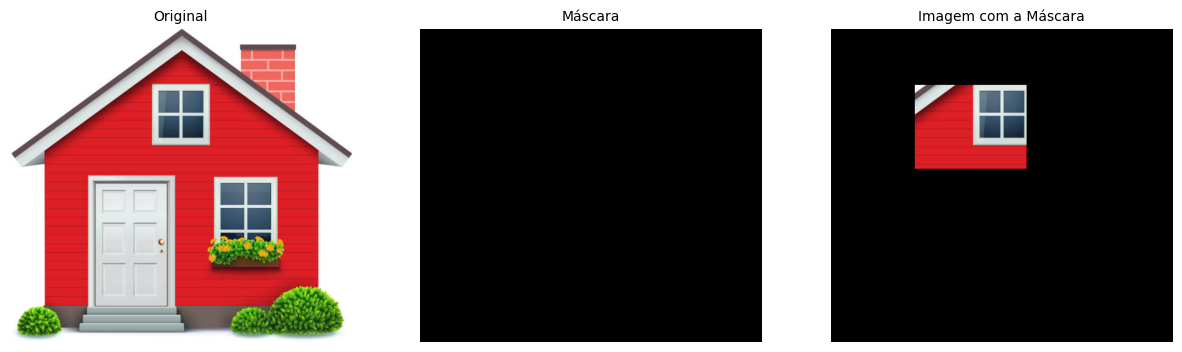

In [28]:
# Carrega a imagem
img10 = cv2.imread('imagens/img10.jpg')

# Cria um array com as dimensões da imagem
mask = np.zeros_like(img10, dtype = 'uint8')

# Define a máscara
mask[100:250, 150:350] = 1

# Multiplica a imagem pela máscara
img_masked = img10 * mask

# Visualiza
visualiza_imagem(img10, mask, img_masked, title = ['Original', 'Máscara', 'Imagem com a Máscara'], figsize = 15)

## Processamento de Pontos

Look-Up Tables ou LUTs são fundamentais para muitos aspectos do processamento de imagens. Uma LUT é simplesmente uma tabela de referências cruzadas ligando números de índice a valores de saída. Podemos fazer isso facilmente usando o método LUT() com o OpenCV. O método LUT transforma uma matriz de números usando uma tabela de consulta (Look-Up Table).

O uso mais comum é determinar as cores e os valores de intensidade com os quais uma determinada imagem será exibida e, nesse contexto, o LUT costuma ser chamado simplesmente de mapa de cores (colormap).

A ideia por trás do mapa de cores é que, em vez de armazenar uma cor definida para cada pixel em uma imagem, por exemplo, no formato RGB de 24 bits, o valor de cada pixel é tratado como um número de índice no mapa de cores. Quando a imagem deve ser exibida ou processada de outra forma, o mapa de cores é usado para procurar as cores reais correspondentes a cada número de índice. Normalmente, os valores de saída armazenados na LUT seriam valores de cores RGB.

Há duas vantagens principais em fazer as coisas dessa maneira. Em primeiro lugar, o número de índice pode ser feito para usar menos bits do que o valor de saída para economizar espaço de armazenamento. Por exemplo, um número de índice de 8 bits pode ser usado para procurar um valor de cor RGB de 24 bits na LUT. Como apenas o número de índice de 8 bits precisa ser armazenado para cada pixel, essas imagens coloridas de 8 bits ocupam menos espaço do que uma imagem completa de 24 bits do mesmo tamanho. É claro que a imagem pode conter apenas 256 cores diferentes (o número de entradas em uma LUT de 8 bits), mas isso é suficiente para muitas aplicações e geralmente a degradação observável da imagem é pequena.

Podemos usar esse recurso para procurar pixels específicos e aplicar correções em imagens (como veremos nas aulas a seguir).

In [29]:
# Cria uma sequência randômica de valores para a tabela de pesquisa.
# Observe que são valores no range de 0 a 256, os valores válidos para os pixels.
tabela_consulta = np.random.randint(low = 0, high = 256, size = (256,), dtype = 'uint8')
tabela_consulta[:10]

array([184, 188, 125, 223,  19,   9,  54,  35,  47,  56], dtype=uint8)

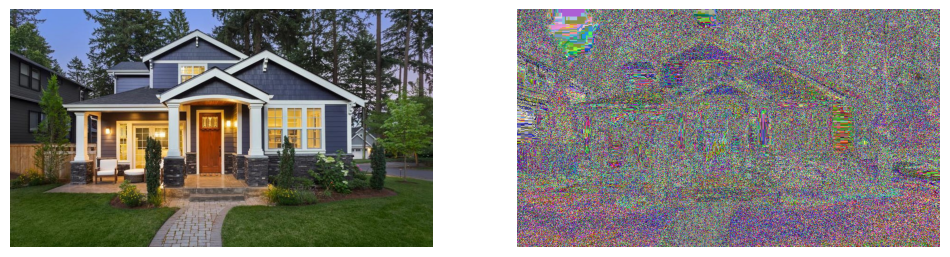

In [30]:
# Carrega a imagem
img9 = cv2.imread('imagens/img9.jpg')

# Aplica o LUT
img9_lut = cv2.LUT(img9, tabela_consulta)

# Visualiza
visualiza_imagem(img9, img9_lut, figsize = 12)

## Gamma Correction (Correção Gamma)

A correção gama é uma operação não linear usada para codificar e decodificar valores de luminância em sistemas de vídeo ou imagem estática.

O manual em pdf no Capítulo 2 do curso traz detalhes sobre o funcionamento desta técnica.

In [31]:
# Função
def get_gamma(gamma):
    
    # Criamos um array de pixels elevando à potência do valor gamma passado como argumento
    lut = np.arange(0, 256) ** gamma
    
    # Aplicamos normalização dos valores (para que os valores fiquem no mesmo range)
    lut = ((lut - lut.min()) / (lut.max() - lut.min())) * 255
    
    # Ajustamos o tipo de dado
    lut = lut.astype('uint8')
    
    # Retorno
    return lut

In [32]:
# Aplica a função com diferentes valores de gamma

# Esse é o valor padrão da imagem
lut1 = get_gamma(1)

# Aqui usaremos um valor menor do que o padrão para aumentar os pixels de tons claros
lut2 = get_gamma(0.3)

# Aqui usaremos um valor maior do que o padrão para aumentar os pixels de tons escuros
lut3 = get_gamma(3)

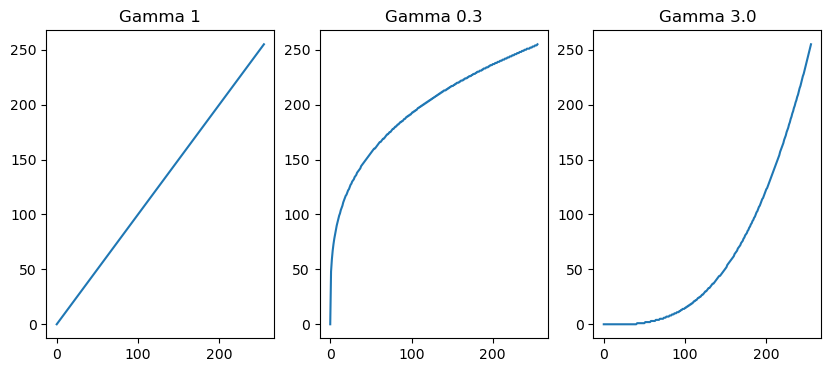

In [33]:
# Plot

plt.figure(figsize = (10, 4))
plt.subplot(1, 3, 1)
plt.plot(np.arange(0, 256), lut1)
plt.title('Gamma 1')

plt.subplot(1, 3, 2)
plt.plot(np.arange(0, 256), lut2)
plt.title('Gamma 0.3')

plt.subplot(1, 3, 3)
plt.plot(np.arange(0, 256), lut3)
plt.title('Gamma 3.0')

plt.show()

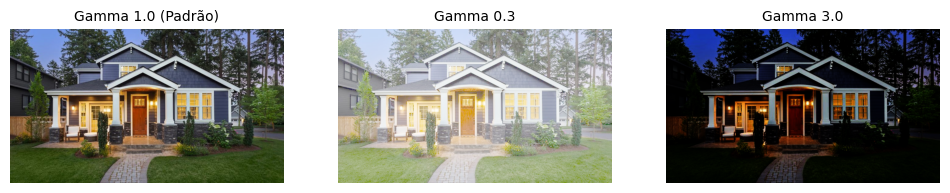

In [34]:
# Carrega a imagem original
img9 = cv2.imread('imagens/img9.jpg')

# Realça tons claros
img9_tons_claros = cv2.LUT(img9, get_gamma(0.3))

# Realça tons escuros
img9_tons_escuros = cv2.LUT(img9, get_gamma(3))

# Visualiza as inagens
visualiza_imagem(img9, 
                 img9_tons_claros, 
                 img9_tons_escuros, 
                 title = ['Gamma 1.0 (Padrão)', 'Gamma 0.3', 'Gamma 3.0'], figsize = 12)

## Piece-wise Linear Transformation

A Piece-wise Linear Transformation é um tipo de transformação de nível de cinza usada para aprimoramento de imagem. É um método de domínio espacial. É utilizado para manipulação de uma imagem para que o resultado seja mais adequado que o original para uma aplicação específica.

Exemplos de aplicação desta técnica:

- Ajuste do Contraste

A imagem de baixo contraste geralmente ocorre devido à iluminação inadequada ou faixa dinâmica não linear ou pequena de um sensor de imagem. Uma alternativa de correção é aumentar a faixa dinâmica de níveis de cinza na imagem.

- Clipping (Recorte)

Um caso especial de ajuste de contraste é o recorte. É usado para redução de ruído quando o sinal de entrada é conhecido. Ele coloca todos os níveis de cinza abaixo de r1 para preto(0) e acima de r2 para branco(1).

- Thresholding

Outro caso especial de ajuste de contraste é o limiar onde l=m=t. Também é usado para redução de ruído. Ele preserva os níveis de cinza além de r1.

- Extração de bits

Uma imagem de 8 bits pode ser representada na forma de plano de bits (Bits Plane). Cada plano representa um bit de todos os valores de pixel. O plano de bits 7 contém o bit mais significativo (MSB) e o plano de bits 0 contém o bit menos significativo (LSB). Os 4 planos MSB contêm a maioria dos dados visualmente significativos. Esta técnica é útil para compressão de imagens e esteganografia.

In [35]:
# Array de pixels
array_pixels = np.arange(0, 256, dtype = 'float32')

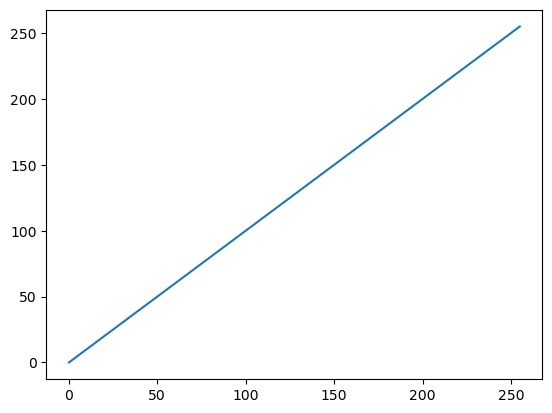

In [36]:
# Plot
plt.plot(np.arange(0, 256), array_pixels)
plt.show()

In [37]:
array_pixels[:64]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.],
      dtype=float32)

In [38]:
# Adicionamos 50 aos valores do array até o índice 64
array_pixels[:64] += 50

In [39]:
array_pixels[:64]

array([ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113.],
      dtype=float32)

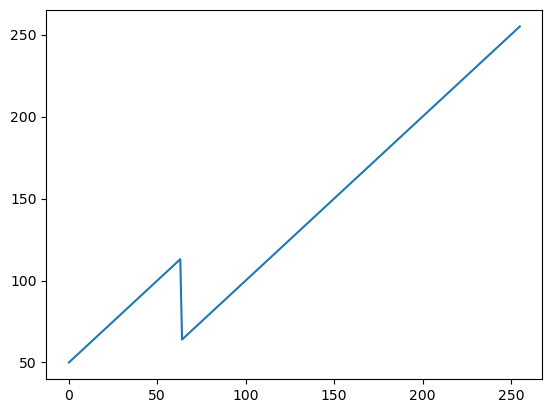

In [40]:
# Plot
plt.plot(np.arange(0, 256), array_pixels)
plt.show()

In [41]:
# Ajusta o tipo de dado
array_pixels = array_pixels.astype('uint8')

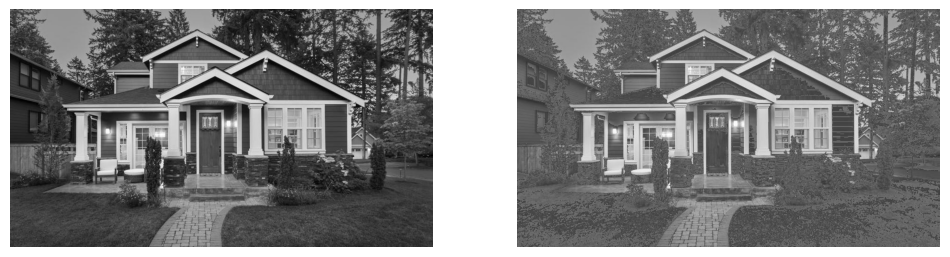

In [42]:
# Carrega a imagem comm escala de cinza
img9 = cv2.imread('imagens/img9.jpg', cv2.IMREAD_GRAYSCALE)

# Aplica o Piece-wise Linear Transformation
img9_lut = cv2.LUT(img9, array_pixels)

# Visualiza
visualiza_imagem(img9, img9_lut, figsize = 12)

## Bit Planes

Um plano de bits de um sinal digital discreto (como imagem ou som) é um conjunto de bits correspondentes a uma determinada posição de bit em cada um dos números binários que representam o sinal.

Por exemplo, para representação de dados de 16 bits, existem planos de 16 bits: o primeiro plano de bits contém o conjunto do bit mais significativo e o 16º contém o bit menos significativo.

É possível ver que o primeiro plano de bits fornece a aproximação mais grosseira, porém mais crítica, dos valores de um meio, e quanto maior o número do plano de bits, menor é sua contribuição para o estágio final. Portanto, adicionar um plano de bits fornece uma aproximação melhor.

Se um bit no plano de bits n em um conjunto de dados de m bits for definido como 1, ele contribuirá com um valor de 2m−n, caso contrário, não contribuirá com nada. Portanto, os planos de bits podem contribuir com metade do valor do plano de bits anterior. Por exemplo, no valor de 8 bits 10110101 (181 em decimal), os planos de bits funcionam da seguinte maneira:

![title](imagens/bitplanes.png)

O plano de bits às vezes é usado como sinônimo de bitmap; no entanto, tecnicamente, o primeiro refere-se à localização dos dados na memória e o último aos próprios dados.

Um aspecto do uso de planos de bits é determinar se um plano de bits é um ruído aleatório ou contém informações significativas.

In [43]:
# Função
def get_bit_planes(image, bit_planes):
    
    # Loop externo
    for i in range(image.shape[0]):
        
        # Loop interno
        for j in range(image.shape[1]):
            
            # Extrai o bit plane
            image[i][j] = image[i][j] & bit_planes
            
    # Normaliza a imagem
    image = (((image - image.min()) / (image.max() - image.min())) * 255.0).astype('uint8')
    
    # Retorno
    return image

In [44]:
# Carrega a imagem original com escala de cinza
img10_A = cv2.imread('imagens/img10.jpg', cv2.IMREAD_GRAYSCALE)

# Resize da imagem (perde qualidade)
img10_B = cv2.resize(img10_A, (int(img10_A.shape[1]/10), int(img10_A.shape[0]/10)))

# Bit planes
img10_C = get_bit_planes(img10_A.copy(), 0b11000000)
img10_D = get_bit_planes(img10_A.copy(), 0b00000001)

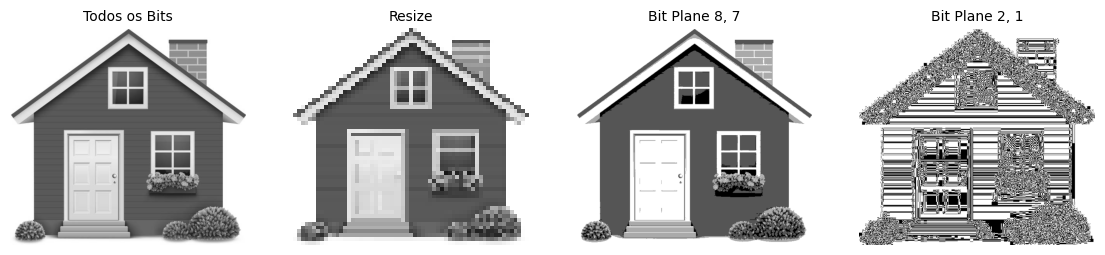

In [45]:
titles = ['Todos os Bits', 'Resize', 'Bit Plane 8, 7', 'Bit Plane 2, 1']
visualiza_imagem(img10_A, img10_B, img10_C, img10_D, figsize = 14, title = titles)

# Fim